#This is a notebook to check lift on pylons

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Input Starts
pylon_file='m600_pylontest.KAD.out' #KAD output
dvr_file='m600_model.dvr' #driver input 
inp_file="m600_model_KAD_only.inp" #KAD input
#Input ends


In [3]:
with open(dvr_file) as fid:
    counter=0
    for line in fid:
        counter +=1
        #print(counter)
        if 'dtaero' in line.lower():
            dt=np.array(line.split()[0],dtype=float)
        if 'KitePxi' in line:
            chs=np.array(line.split(),dtype=str)
            print(chs)
            break
inputs=np.loadtxt(dvr_file,skiprows=counter+1,dtype=float)       
print(('dtaero from{:s} = {:3f}').format(str(dvr_file),dt), 'sec')


['Time' 'KitePxi' 'KitePyi' 'KitePzi' 'KiteRoll' 'KitePitch' 'KiteYaw'
 'KiteTVxi' 'KiteTVyi' 'KiteTVzi' 'KiteRVxi' 'KiteRVyi' 'KiteRVzi'
 'SP1TRtSpd' 'SP1BRtSpd' 'SP2TRtSpd' 'SP2BRtSpd' 'PP1TRtSpd' 'PP1BRtSpd'
 'PP2TRtSpd' 'PP2BRtSpd' 'SP1TPitch' 'SP1BPitch' 'SP2TPitch' 'SP2BPitch'
 'PP1TPitch' 'PP1BPitch' 'PP2TPitch' 'PP2BPitch' 'SFlp1Ctrl' 'SFlp2Ctrl'
 'SFlp3Ctrl' 'PFlp1Ctrl' 'PFlp2Ctrl' 'PFlp3Ctrl' 'Rudr1Ctrl' 'Rudr2Ctrl'
 'SElv1Ctrl' 'SElv2Ctrl' 'PElv1Ctrl' 'PElv2Ctrl']
dtaero fromm600_model.dvr = 1.000000 sec


In [4]:
ncases=np.int((inputs[-1,0]-inputs[0,0])/dt)+1
print(ncases)

11


In [5]:
#Read what the input conditions were for each case
inputs=np.reshape(inputs,[-1,len(chs)]) 

In [6]:
#Read from KAD input file the location of the nodes on the pylon
with open(inp_file) as fid:
    counter=0
    for line in fid:
        counter +=1
        #print(counter)
        if 'NumPylNds'.lower() in line.lower():
            NPylNds=int(line.split()[0])
            counter2=np.copy(counter)
        if 'PylOutNd'.lower() in line.lower():
            junk=line.split()
            idx=junk.index('PylOutNd')
            print(idx)
            nodelist=np.array(junk[0:idx],dtype=int)-1
            break

nNodes=len(nodelist)
print('nodelist=',nodelist)
#reopen and read coordinate z
pylnodes=np.loadtxt(inp_file,skiprows=counter2+2,dtype=float,max_rows=NPylNds,usecols=(0,1,2,3,4,5))    
zs=pylnodes[nodelist,2]

print(('pylon node zs from {:s} ='+ nNodes*' {:3f}').format(str(inp_file),*zs), 'm')

9
nodelist= [ 0  2  3  5  6  7  9 11 12]
pylon node zs from m600_model_KAD_only.inp = -1.470000 -1.200000 -1.120000 -0.880000 -0.120000 0.020000 1.290000 1.540000 1.700000 m


In [7]:
#Find values of betas based on yaw
yaw_idx=np.where('KiteYaw'==chs)
betas=inputs[:,yaw_idx].flatten()
betas=np.linspace(betas[0],betas[1],ncases)
print(betas)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]


In [8]:
nPpW=2 #number of pylons per wing
df_pyl=pd.read_csv(pylon_file,header=1,squeeze=True,delim_whitespace=True,skiprows=1,low_memory=False); #nrows=10,b 
df_pyl.head()

,Time,KiteFxi,KiteFyi,KiteFzi,KiteMxi,KiteMyi,KiteMzi,AirfFxi,AirfFyi,AirfFzi,...,PP28Fl,PP28Fd,PP28Mm,PP28Fn,PP28Fc,PP29Fl,PP29Fd,PP29Mm,PP29Fn,PP29Fc
0,s,(N),(N),(N),(Nm),(Nm),(Nm),(N),(N),(N),...,(N),(N),(Nm),(N),(N),(N),(N),(Nm),(N),(N)
1,0.0000,6.455E+03,2.078E+04,9.068E+04,2.593E+04,-1.538E+04,-6.260E+04,6.455E+03,2.078E+04,9.068E+04,...,1.843E+03,2.265E+02,1.523E+02,1.776E+03,5.425E+02,5.470E+02,6.723E+01,2.464E+01,5.271E+02,1.610E+02
2,1.0000,6.436E+03,1.843E+04,9.186E+04,2.114E+04,-1.596E+04,-5.171E+04,6.436E+03,1.843E+04,9.186E+04,...,1.470E+03,2.197E+02,1.331E+02,1.425E+03,4.218E+02,4.364E+02,6.521E+01,2.152E+01,4.231E+02,1.252E+02
3,2.0000,6.427E+03,1.574E+04,9.285E+04,1.611E+04,-1.629E+04,-3.982E+04,6.427E+03,1.574E+04,9.285E+04,...,1.091E+03,2.146E+02,1.098E+02,1.063E+03,3.272E+02,3.238E+02,6.370E+01,1.776E+01,3.154E+02,9.714E+01
4,3.0000,6.423E+03,1.279E+04,9.363E+04,1.099E+04,-1.639E+04,-2.725E+04,6.423E+03,1.279E+04,9.363E+04,...,7.078E+02,2.111E+02,8.235E+01,6.913E+02,2.599E+02,2.101E+02,6.267E+01,1.332E+01,2.052E+02,7.715E+01


In [9]:

nNodestr=[str(int(i)) for i in np.linspace(1,9,9)]
pylstrFl=np.core.defchararray.add(np.core.defchararray.add(np.tile('SP1',nNodes),nNodestr   ),np.tile('Fl',nNodes))
pylstrFn=np.core.defchararray.add(np.core.defchararray.add(np.tile('SP1',nNodes),nNodestr   ),np.tile('Fn',nNodes))
pylstrAOA=np.core.defchararray.add(np.core.defchararray.add(np.tile('SP1',nNodes),nNodestr   ),np.tile('Alpha',nNodes))
Fl=df_pyl.loc[1:,pylstrFl].astype('float').to_numpy()
Fn=df_pyl.loc[1:,pylstrFn].astype('float').to_numpy()
AOA=df_pyl.loc[1:,pylstrAOA].astype('float').to_numpy()
Fl.shape,pylstrFl,pylstrFn,AOA

((11, 9), array(['SP11Fl', 'SP12Fl', 'SP13Fl', 'SP14Fl', 'SP15Fl', 'SP16Fl',
        'SP17Fl', 'SP18Fl', 'SP19Fl'], dtype='<U6'), array(['SP11Fn', 'SP12Fn', 'SP13Fn', 'SP14Fn', 'SP15Fn', 'SP16Fn',
        'SP17Fn', 'SP18Fn', 'SP19Fn'], dtype='<U6'), array([[-9.982, -9.982, -9.982, -9.982, -9.982, -9.982, -9.982, -9.982,
         -9.982],
        [-7.986, -7.986, -7.986, -7.986, -7.986, -7.986, -7.986, -7.986,
         -7.986],
        [-5.989, -5.989, -5.989, -5.989, -5.989, -5.989, -5.989, -5.989,
         -5.989],
        [-3.993, -3.993, -3.993, -3.993, -3.993, -3.993, -3.993, -3.993,
         -3.993],
        [-1.996, -1.996, -1.996, -1.996, -1.996, -1.996, -1.996, -1.996,
         -1.996],
        [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
          0.   ],
        [ 1.996,  1.996,  1.996,  1.996,  1.996,  1.996,  1.996,  1.996,
          1.996],
        [ 3.993,  3.993,  3.993,  3.993,  3.993,  3.993,  3.993,  3.993,
          3.993],
        [ 5.989,  5.989

In [10]:
Fl[0,:]

array([2636., 2628., 1931., 1292., 2894., 4239., 2429., 1843.,  547.])

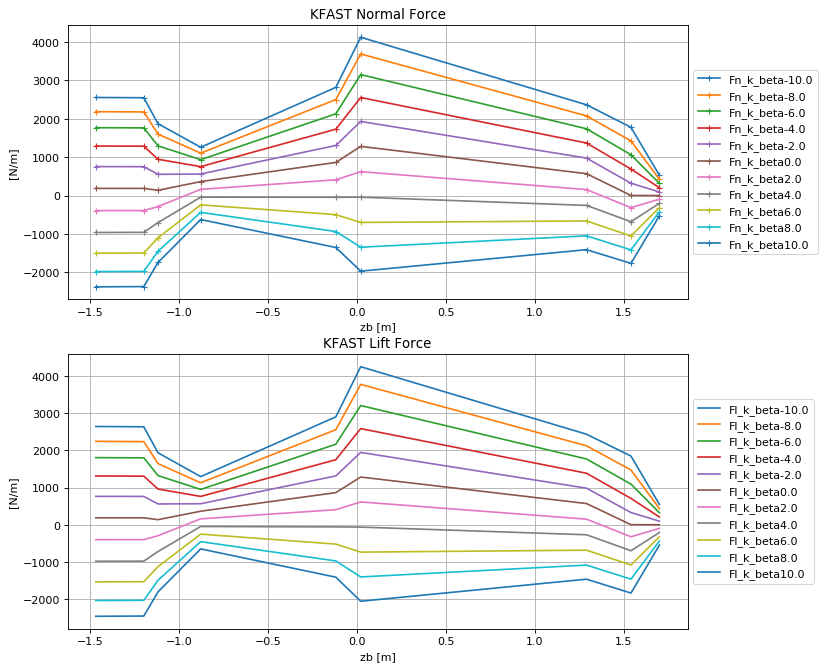

In [11]:
fig= plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(2, 1, 1)
#plt.subplot(1,2,1)
#Xg_k.plot(x=time_k[idx_k]) ; 
for ii in range(0,ncases):
    ax.plot(zs,Fn[ii,:],label='Fn_k_beta'+str(betas[ii]),marker='+')

ax.set_xlabel('zb [m]')
ax.set_ylabel('[N/m]')
ax.set_title('KFAST Normal Force')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

ax1 = fig.add_subplot(2, 1, 2)
#plt.subplot(1,2,1)
#Xg_k.plot(x=time_k[idx_k]) ; 
for ii in range(0,ncases):
    ax1.plot(zs,Fl[ii,:],label='Fl_k_beta'+str(betas[ii]))

ax1.set_xlabel('zb [m]')
ax1.set_ylabel('[N/m]')
ax1.set_title('KFAST Lift Force')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid()
plt.show()
